In [2]:
import pandas as pd
import numpy as np
from datetime import date, datetime
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('input\/COVID-19_geo_timeseries_ver_0311.csv', parse_dates=True)
df['update_time'] = pd.to_datetime(df['update_time'], infer_datetime_format=True)
df = df.set_index('update_time')

In [4]:
df.head(500)

province        country   latitude   longitude  \
update_time                                                                 
2020-01-24 14:55:00           Hubei          China  35.861660  104.195397   
2020-01-24 14:55:00       Guangdong          China  35.861660  104.195397   
2020-01-24 14:55:00        Zhejiang          China  35.861660  104.195397   
2020-01-24 14:55:00         Beijing          China  35.861660  104.195397   
2020-01-24 14:55:00       Chongqing          China  35.861660  104.195397   
2020-01-24 14:55:00           Hunan          China  35.861660  104.195397   
2020-01-24 14:55:00         Guangxi          China  35.861660  104.195397   
2020-01-24 14:55:00        Shanghai          China  35.861660  104.195397   
2020-01-24 14:55:00         Jiangxi          China  35.861660  104.195397   
2020-01-24 14:55:00           Anhui          China  35.861660  104.195397   
2020-01-24 14:55:00         Sichuan          China  35.861660  104.195397   
2020-01-24 14:55:00        Shandong          China  35.861660  104.195397   
2020-01-24 14:55:00          Fujian          China  35.861660  104.195397   
2020-01-24 14:55:00           Henan          China  35.861660  104.195397   
2020-01-24 14:55:00         Jiangsu          China  35.861660  104.195397   
2020-01-24 14:55:00          Hainan          China  35.861660  104.195397   
2020-01-24 14:55:00         Tianjin          China  35.861660  104.195397   
2020-01-24 14:55:00         Shaanxi          China  35.861660  104.195397   
2020-01-24 14:55:00          Yunnan          China  35.861660  104.195397   
2020-01-24 14:55:00       Hong Kong          China  35.861660  104.195397   
2020-01-24 14:55:00             NaN       Thailand  15.870032  100.992541   
2020-01-24 14:55:00        Liaoning          China  35.861660  104.195397   
2020-01-24 14:55:00    Heilongjiang          China  35.861660  104.195397   
2020-01-24 14:55:00         Guizhou          China  35.861660  104.195397   
2020-01-24 14:55:00           Jilin          China  35.861660  104.195397   
2020-01-24 14:55:00          Taiwan          China  35.861660  104.195397   
2020-01-24 14:55:00             NaN      Singapore   1.352083  103.819836   
2020-01-24 14:55:00             NaN         France  46.227638    2.213749   
2020-01-24 14:55:00        Xinjiang          China  35.861660  104.195397   
2020-01-24 14:55:00         Ningxia          China  35.861660  104.195397   
2020-01-24 14:55:00           Hebei          China  35.861660  104.195397   
2020-01-24 14:55:00           Gansu          China  35.861660  104.195397   
2020-01-24 14:55:00           Macau          China  35.861660  104.195397   
2020-01-24 14:55:00             NaN          Japan  36.204824  138.252924   
2020-01-24 14:55:00             NaN    South Korea  35.907757  127.766922   
2020-01-24 14:55:00             NaN  United States  37.090240  -95.712891   
2020-01-24 14:55:00             NaN        Vietnam  14.058324  108.277199   
2020-01-24 14:55:00          Shanxi          China  35.861660  104.195397   
2020-01-24 14:55:00  Inner Mongolia          China  35.861660  104.195397   
2020-01-24 14:55:00             NaN          Nepal  28.394857   84.124008   
2020-01-25 17:05:00           Hubei          China  35.861660  104.195397   
2020-01-25 17:05:00       Guangdong          China  35.861660  104.195397   
2020-01-25 17:05:00        Zhejiang          China  35.861660  104.195397   
2020-01-25 17:05:00       Chongqing          China  35.861660  104.195397   
2020-01-25 17:05:00         Beijing          China  35.861660  104.195397   
2020-01-25 17:05:00           Hunan          China  35.861660  104.195397   
2020-01-25 17:05:00           Anhui          China  35.861660  104.195397   
2020-01-25 17:05:00         Jiangxi          China  35.861660  104.195397   
2020-01-25 17:05:00        Shanghai          China  35.861660  104.195397   
2020-01-25 17:05:00         Guangxi          China  35.861660  104.195397   
2020-01-25 17:05:00    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24791 entries, 2020-01-24 14:55:00 to 2020-03-11 23:53:00
Data columns (total 11 columns):
province           22483 non-null object
country            24791 non-null object
latitude           24698 non-null float64
longitude          24698 non-null float64
confirmed_cases    24791 non-null int64
deaths             24785 non-null float64
recovered          4935 non-null float64
data_source        24791 non-null object
country_code       24722 non-null object
region             24722 non-null object
country_flag       24722 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 2.3+ MB


In [6]:
df.describe()

latitude     longitude  confirmed_cases        deaths    recovered
count  24698.000000  24698.000000     24791.000000  24785.000000   4935.00000
mean      34.902915     89.982701       506.282038     12.104095    201.01155
std        9.030786     47.900761      3203.578500    111.383410   2179.79852
min      -40.900557   -106.346771         0.000000      0.000000      0.00000
25%       35.861660    104.195397         8.000000      0.000000      0.00000
50%       35.861660    104.195397        50.000000      0.000000      1.00000
75%       35.861660    104.195397       202.000000      1.000000     14.00000
max       64.963051    174.885971     67773.000000   3046.000000  49134.00000

In [7]:
df = df.drop(['data_source', 'country_code', 'country', 'country_flag', 'province', 'latitude', 'longitude'], axis=1)

In [8]:
df.head()

confirmed_cases  deaths  recovered region
update_time                                                   
2020-01-24 14:55:00              729    39.0        NaN   Asia
2020-01-24 14:55:00               53     0.0        NaN   Asia
2020-01-24 14:55:00               43     0.0        NaN   Asia
2020-01-24 14:55:00               36     0.0        NaN   Asia
2020-01-24 14:55:00               27     0.0        NaN   Asia

In [9]:
df.groupby('region').count()

confirmed_cases  deaths  recovered
region                                      
Africa                107     107        107
Americas             1297    1297       1247
Asia                22174   22174       2524
Europe                878     878        754
Oceania               266     261        238

In [10]:
df.region.unique()

array(['Asia', 'Europe', 'Americas', 'Oceania', nan, 'Africa'],
      dtype=object)

In [11]:
df.index.unique()

DatetimeIndex(['2020-01-24 14:55:00', '2020-01-25 17:05:00',
               '2020-01-25 03:16:00', '2020-01-25 05:20:00',
               '2020-01-25 04:58:00', '2020-01-26 13:24:00',
               '2020-01-26 16:14:00', '2020-01-27 15:34:00',
               '2020-01-27 18:54:00', '2020-01-27 20:10:00',
               ...
               '2020-03-11 20:13:00', '2020-03-11 20:53:00',
               '2020-03-11 21:13:00', '2020-03-11 21:33:00',
               '2020-03-11 22:13:00', '2020-03-11 22:33:00',
               '2020-03-11 22:53:00', '2020-03-11 23:13:00',
               '2020-03-11 23:33:00', '2020-03-11 23:53:00'],
              dtype='datetime64[ns]', name='update_time', length=1823, freq=None)

In [12]:
final_df = pd.DataFrame(index = df.index.unique())
for val in df.region.unique():
    df_by_province = df.loc[(df.region == val)]
    df_by_province.drop_duplicates(inplace=True)
    df_by_province = df_by_province.drop(['region'], axis=1)
    df_by_province = df_by_province.add_prefix(str(val)+'_')
    final_df = pd.concat([final_df, df_by_province.groupby(df_by_province.index).sum()], axis=1, join='outer', sort=True) 

C:\Users\silva\Anaconda3\envs\mestrado\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
final_df = final_df.dropna(how='all', axis=1)

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1823 entries, 2020-01-22 09:28:10 to 2020-03-11 23:53:00
Data columns (total 15 columns):
Asia_confirmed_cases        1076 non-null float64
Asia_deaths                 1076 non-null float64
Asia_recovered              1076 non-null float64
Europe_confirmed_cases      142 non-null float64
Europe_deaths               142 non-null float64
Europe_recovered            142 non-null float64
Americas_confirmed_cases    98 non-null float64
Americas_deaths             98 non-null float64
Americas_recovered          98 non-null float64
Oceania_confirmed_cases     42 non-null float64
Oceania_deaths              42 non-null float64
Oceania_recovered           42 non-null float64
Africa_confirmed_cases      21 non-null float64
Africa_deaths               21 non-null float64
Africa_recovered            21 non-null float64
dtypes: float64(15)
memory usage: 227.9 KB


In [15]:
final_df

Asia_confirmed_cases  Asia_deaths  Asia_recovered  \
update_time                                                              
2020-01-22 09:28:10                 270.0          6.0             0.0   
2020-01-22 14:23:14                   NaN          NaN             NaN   
2020-01-22 14:25:14                   NaN          NaN             NaN   
2020-01-22 16:39:34                   NaN          NaN             NaN   
2020-01-22 17:00:00                 521.0         17.0            28.0   
2020-01-22 17:11:42                 270.0          9.0             0.0   
2020-01-22 17:32:49                   NaN          NaN             NaN   
2020-01-22 19:06:15                   NaN          NaN             NaN   
2020-01-22 19:07:16                   NaN          NaN             NaN   
2020-01-22 20:40:44                   NaN          NaN             NaN   
2020-01-22 20:41:44                   NaN          NaN             NaN   
2020-01-22 21:21:55                   NaN          NaN             NaN   
2020-01-22 22:46:21                 375.0          9.0             0.0   
2020-01-22 22:47:22                   NaN          NaN             NaN   
2020-01-22 22:48:22                   NaN          NaN             NaN   
2020-01-22 23:28:34                   NaN          NaN             NaN   
2020-01-23 00:19:49                   NaN          NaN             NaN   
2020-01-23 00:26:51                   NaN          NaN             NaN   
2020-01-23 00:45:57                   NaN          NaN             NaN   
2020-01-23 00:48:58                   NaN          NaN             NaN   
2020-01-23 00:52:59                   NaN          NaN             NaN   
2020-01-23 00:55:00                   NaN          NaN             NaN   
2020-01-23 01:19:07                   NaN          NaN             NaN   
2020-01-23 01:28:10                   NaN          NaN             NaN   
2020-01-23 01:31:11                   NaN          NaN             NaN   
2020-01-23 04:13:26                   NaN          NaN             NaN   
2020-01-23 04:30:37                 444.0         17.0             0.0   
2020-01-23 05:02:01                   NaN          NaN             NaN   
2020-01-23 06:01:40                   NaN          NaN             NaN   
2020-01-23 06:22:09                   NaN          NaN             NaN   
2020-01-23 14:13:12                   NaN          NaN             NaN   
2020-01-23 14:15:13                   NaN          NaN             NaN   
2020-01-23 14:55:40                   NaN          NaN             NaN   
2020-01-23 14:56:40                   NaN          NaN             NaN   
2020-01-23 16:11:06                   NaN          NaN             NaN   
2020-01-23 16:13:07                   NaN          NaN             NaN   
2020-01-23 16:51:33                   NaN          NaN             NaN   
2020-01-23 17:00:00                 116.0          1.0             2.0   
2020-01-23 17:18:51                   NaN          NaN             NaN   
2020-01-23 17:55:16                   NaN          NaN             NaN   
2020-01-23 17:56:17                   NaN          NaN             NaN   
2020-01-23 18:49:32                   NaN          NaN             NaN   
2020-01-23 18:52:01                   NaN          NaN             NaN   
2020-01-23 18:54:04                   NaN          NaN             NaN   
2020-01-23 19:36:35                   NaN          NaN             NaN   
2020-01-23 19:59:52                   NaN          NaN             NaN   
2020-01-23 22:41:56                   NaN          NaN             NaN   
2020-01-23 23:21:26                   NaN          NaN             NaN   
2020-01-24 00:14:12                   NaN          NaN             NaN   
2020-01-24 00:15:13                   NaN          NaN             NaN   
2020-01-24 00:16:14                   NaN          NaN             NaN   
2020-01-24 00:53:44                   NaN          NaN             NaN   
2020-01-24 01:11:59      

In [16]:
df_hourly = final_df.resample('30T').mean()

In [17]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2382 entries, 2020-01-22 09:00:00 to 2020-03-11 23:30:00
Freq: 30T
Data columns (total 15 columns):
Asia_confirmed_cases        809 non-null float64
Asia_deaths                 809 non-null float64
Asia_recovered              809 non-null float64
Europe_confirmed_cases      129 non-null float64
Europe_deaths               129 non-null float64
Europe_recovered            129 non-null float64
Americas_confirmed_cases    88 non-null float64
Americas_deaths             88 non-null float64
Americas_recovered          88 non-null float64
Oceania_confirmed_cases     39 non-null float64
Oceania_deaths              39 non-null float64
Oceania_recovered           39 non-null float64
Africa_confirmed_cases      20 non-null float64
Africa_deaths               20 non-null float64
Africa_recovered            20 non-null float64
dtypes: float64(15)
memory usage: 297.8 KB


In [18]:
df_hourly

Asia_confirmed_cases  Asia_deaths  Asia_recovered  \
update_time                                                              
2020-01-22 09:00:00            270.000000     6.000000        0.000000   
2020-01-22 09:30:00                   NaN          NaN             NaN   
2020-01-22 10:00:00                   NaN          NaN             NaN   
2020-01-22 10:30:00                   NaN          NaN             NaN   
2020-01-22 11:00:00                   NaN          NaN             NaN   
2020-01-22 11:30:00                   NaN          NaN             NaN   
2020-01-22 12:00:00                   NaN          NaN             NaN   
2020-01-22 12:30:00                   NaN          NaN             NaN   
2020-01-22 13:00:00                   NaN          NaN             NaN   
2020-01-22 13:30:00                   NaN          NaN             NaN   
2020-01-22 14:00:00                   NaN          NaN             NaN   
2020-01-22 14:30:00                   NaN          NaN             NaN   
2020-01-22 15:00:00                   NaN          NaN             NaN   
2020-01-22 15:30:00                   NaN          NaN             NaN   
2020-01-22 16:00:00                   NaN          NaN             NaN   
2020-01-22 16:30:00                   NaN          NaN             NaN   
2020-01-22 17:00:00            395.500000    13.000000       14.000000   
2020-01-22 17:30:00                   NaN          NaN             NaN   
2020-01-22 18:00:00                   NaN          NaN             NaN   
2020-01-22 18:30:00                   NaN          NaN             NaN   
2020-01-22 19:00:00                   NaN          NaN             NaN   
2020-01-22 19:30:00                   NaN          NaN             NaN   
2020-01-22 20:00:00                   NaN          NaN             NaN   
2020-01-22 20:30:00                   NaN          NaN             NaN   
2020-01-22 21:00:00                   NaN          NaN             NaN   
2020-01-22 21:30:00                   NaN          NaN             NaN   
2020-01-22 22:00:00                   NaN          NaN             NaN   
2020-01-22 22:30:00            375.000000     9.000000        0.000000   
2020-01-22 23:00:00                   NaN          NaN             NaN   
2020-01-22 23:30:00                   NaN          NaN             NaN   
2020-01-23 00:00:00                   NaN          NaN             NaN   
2020-01-23 00:30:00                   NaN          NaN             NaN   
2020-01-23 01:00:00                   NaN          NaN             NaN   
2020-01-23 01:30:00                   NaN          NaN             NaN   
2020-01-23 02:00:00                   NaN          NaN             NaN   
2020-01-23 02:30:00                   NaN          NaN             NaN   
2020-01-23 03:00:00                   NaN          NaN             NaN   
2020-01-23 03:30:00                   NaN          NaN             NaN   
2020-01-23 04:00:00                   NaN          NaN             NaN   
2020-01-23 04:30:00            444.000000    17.000000        0.000000   
2020-01-23 05:00:00                   NaN          NaN             NaN   
2020-01-23 05:30:00                   NaN          NaN             NaN   
2020-01-23 06:00:00                   NaN          NaN             NaN   
2020-01-23 06:30:00                   NaN          NaN             NaN   
2020-01-23 07:00:00                   NaN          NaN             NaN   
2020-01-23 07:30:00                   NaN          NaN             NaN   
2020-01-23 08:00:00                   NaN          NaN             NaN   
2020-01-23 08:30:00                   NaN          NaN             NaN   
2020-01-23 09:00:00                   NaN          NaN             NaN   
2020-01-23 09:30:00                   NaN          NaN             NaN   
2020-01-23 10:00:00                   NaN          NaN             NaN   
2020-01-23 10:30:00                   NaN          NaN             NaN   
2020-01-23 11:00:00      

In [19]:
df_hourly.to_csv(r'output\/CompleteCovid.csv', index = True)

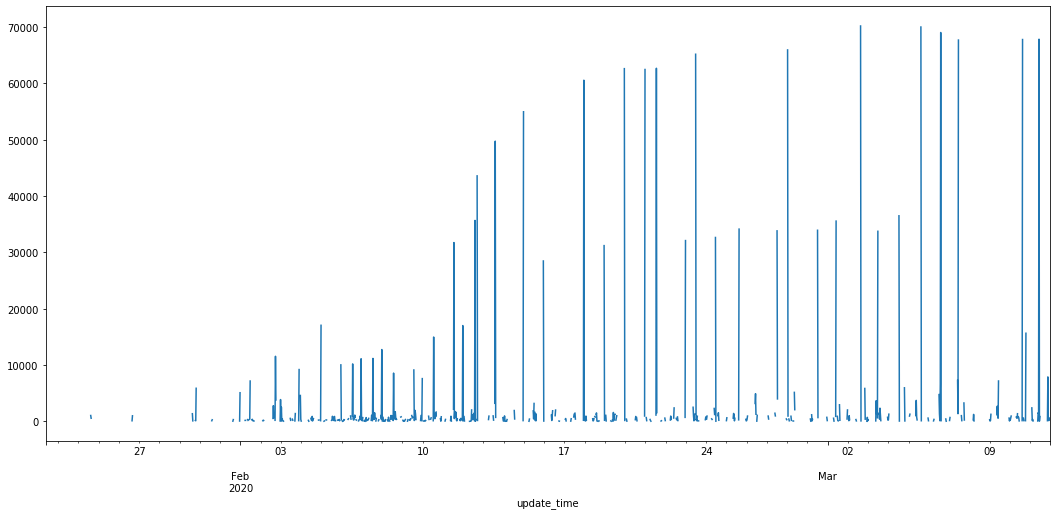

In [28]:
df_hourly.loc[:,'Asia_confirmed_cases'].plot(figsize=(18,8))